In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv("Online Sales Data.csv")
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,01-01-2024,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,02-01-2024,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,03-01-2024,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,04-01-2024,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,05-01-2024,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [2]:
df.shape

(240, 9)

In [3]:
df.describe()


,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [5]:
pd.isnull(df).sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

Exploratory data analysis

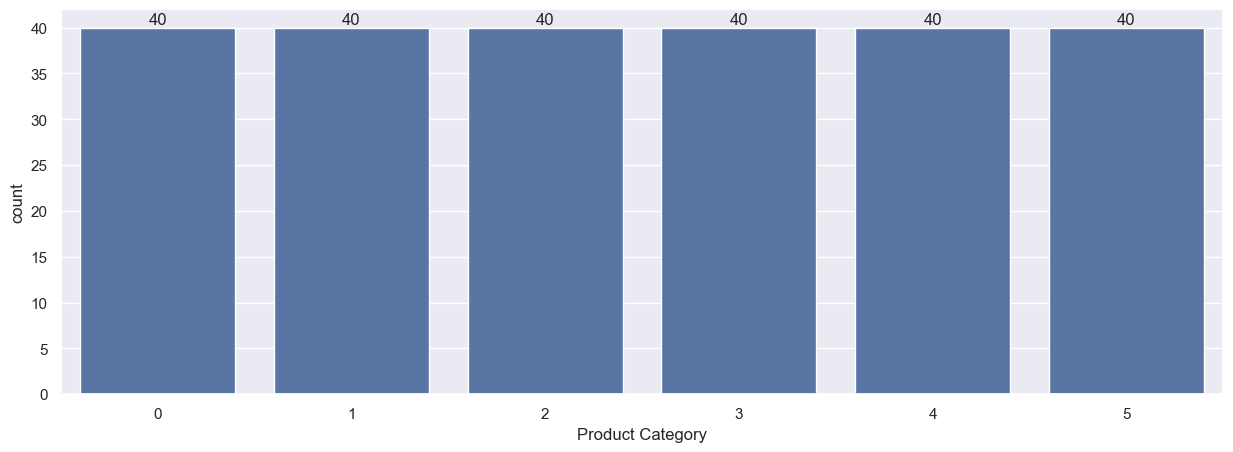

In [38]:
ax=sns.countplot(x='Product Category',data=df)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product Category', ylabel='Unit Price'>

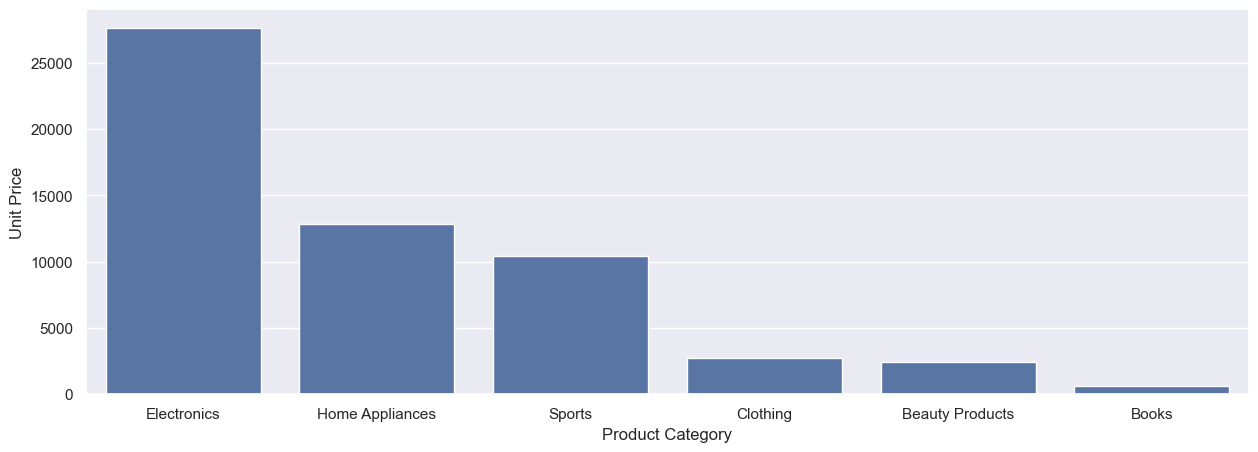

In [8]:
sns_data=df.groupby(['Product Category'],as_index=False)['Unit Price'].sum().sort_values(by='Unit Price',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Product Category',y='Unit Price',data=sns_data)

<Axes: xlabel='Product Category', ylabel='Units Sold'>

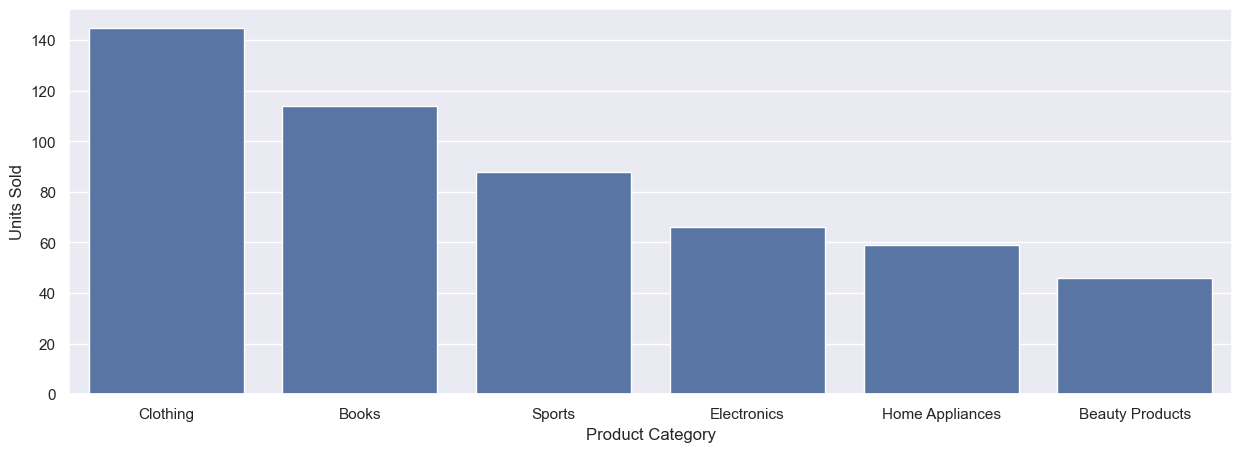

In [9]:
sns_data=df.groupby(['Product Category'],as_index=False)['Units Sold'].sum().sort_values(by='Units Sold',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Product Category',y='Units Sold',data=sns_data)

<Axes: xlabel='Region', ylabel='Total Revenue'>

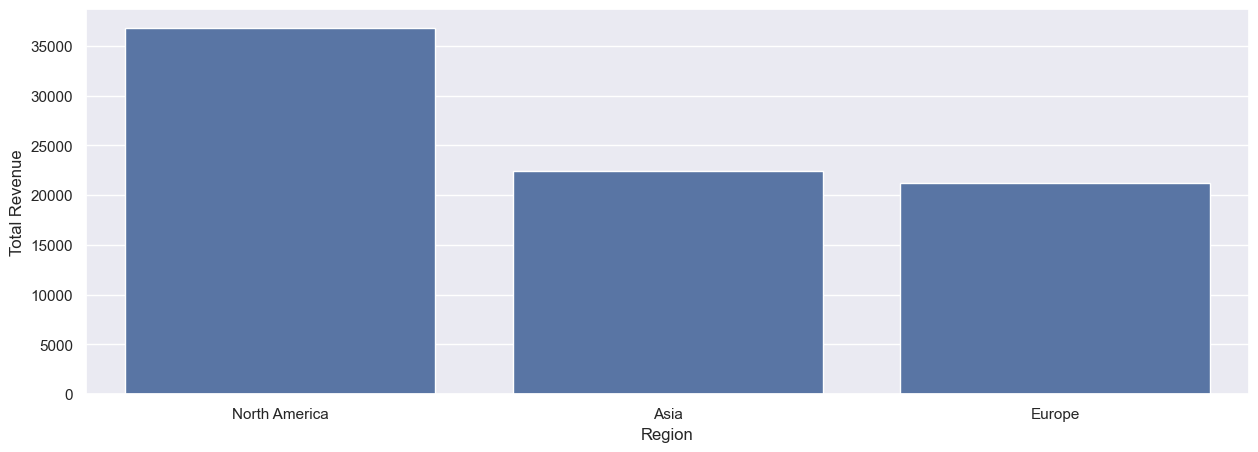

In [10]:
sns_data=df.groupby(['Region'],as_index=False)['Total Revenue'].sum().sort_values(by='Total Revenue',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Region',y='Total Revenue',data=sns_data)

<Axes: xlabel='Region', ylabel='Units Sold'>

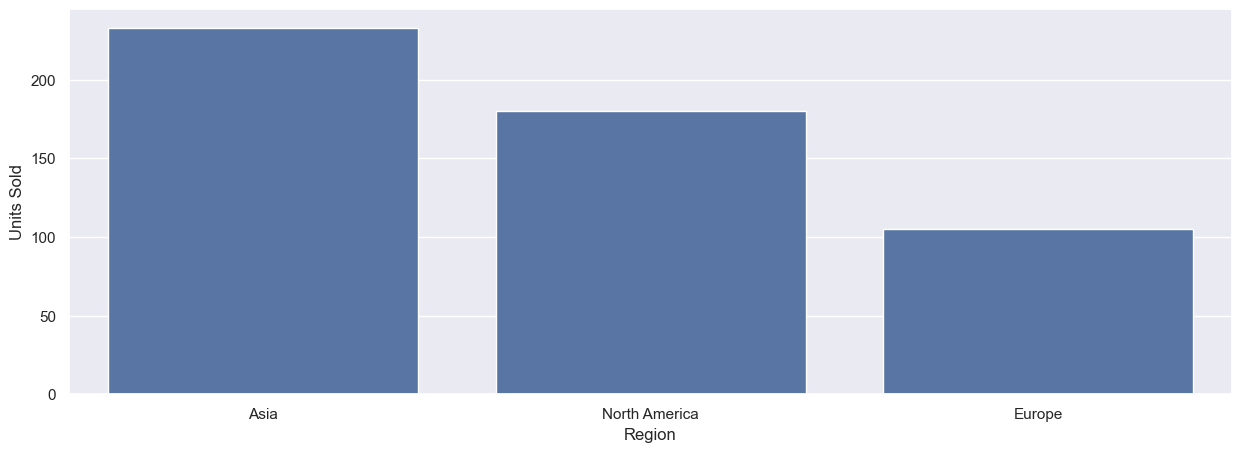

In [11]:
sns_data=df.groupby(['Region'],as_index=False)['Units Sold'].sum().sort_values(by='Units Sold',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Region',y='Units Sold',data=sns_data)

Insights-
In product Category,the sales is more in electronics,units sold is more in clothing
In regionwise the total revenue is more in North america,units sold is more in asia

In [13]:
from sklearn.preprocessing import LabelEncoder
df['Product Name']=LabelEncoder().fit_transform(df['Product Name'])

In [14]:
from sklearn.preprocessing import LabelEncoder
df['Product Category']=LabelEncoder().fit_transform(df['Product Category'])

In [15]:
from sklearn.preprocessing import LabelEncoder
df['Region']=LabelEncoder().fit_transform(df['Region'])

In [16]:
from sklearn.preprocessing import LabelEncoder
df['Payment Method']=LabelEncoder().fit_transform(df['Payment Method'])

In [17]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-3].values

In [18]:
X

array([[10001, '01-01-2024', 3, ..., 999.99, 1999.98, 2],
       [10002, '02-01-2024', 4, ..., 499.99, 499.99, 1],
       [10003, '03-01-2024', 2, ..., 69.99, 209.97, 0],
       ...,
       [10238, '25-08-2024', 1, ..., 10.99, 32.97, 2],
       [10239, '26-08-2024', 0, ..., 55.0, 55.0, 1],
       [10240, '27-08-2024', 5, ..., 29.99, 59.98, 0]], dtype=object)

In [20]:
from sklearn.model_selection import train_test_split
features=["Product Category", "Product Name","Unit Price", "Units Sold","Region"]
X=df[features]
y=df.iloc[:,-3].values
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state = 0)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

model1=LinearRegression()
model1.fit(train_X, train_y)
pred1=model1.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred1)))
print(r2_score(test_y,pred1))

Mean Absolute Error: 100.395782
0.7718244414568766


In [24]:
import matplotlib

Text(0, 0.5, 'test_y')

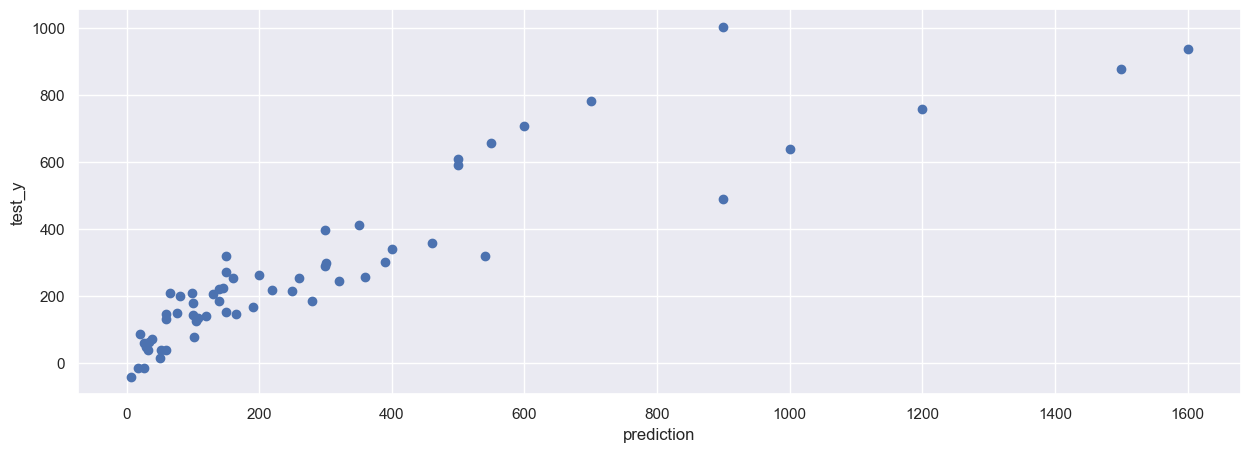

In [30]:
matplotlib.pyplot.scatter(test_y,pred1)
matplotlib.pyplot.xlabel('prediction')
matplotlib.pyplot.ylabel('test_y')

In [32]:
model1.coef_

array([25.94793242, -0.21926555,  1.03320141, 45.63622548, 20.42743339])

In [34]:
X

,Product Category,Product Name,Unit Price,Units Sold,Region
0,3,230,999.99,2,2
1,4,59,499.99,1,1
2,2,115,69.99,3,0
3,1,182,15.99,4,2
4,0,131,89.99,1,1
...,...,...,...,...,...
235,4,128,159.99,1,1
236,2,133,90.00,3,0
237,1,189,10.99,3,2
238,0,175,55.00,1,1


In [36]:
pd.DataFrame(model1.coef_,X.columns,columns=['Coefficient'])

,Coefficient
Product Category,25.947932
Product Name,-0.219266
Unit Price,1.033201
Units Sold,45.636225
Region,20.427433
